# ++ Carregar dados históricos da Bovespa em Dataframe para análise ++

In [1]:
from datetime import date, datetime, timedelta
import time
hoje = datetime.today().strftime('%d/%m/%Y')
time.asctime( time.localtime(time.time()) )

'Fri Apr 11 17:25:43 2025'

In [2]:
import pandas as pd
from ipywidgets import IntProgress
import ipywidgets as widgets
import json
from bs4 import BeautifulSoup
pd.__version__

'1.3.4'

In [3]:
from IPython.display import FileLink, FileLinks, display, clear_output, Markdown
FileLink('Resultados.ipynb')

C:\Users\F0435280\OneDrive - Banco do Brasil S.A\Área de Trabalho\Alexandre\StockManager-main\Resultados.ipynb

In [4]:
# Setando opção do Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Setando separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
from pacote.functions import *

In [6]:
ano = time.localtime().tm_year
if time.localtime().tm_mon < 3 and ano == time.localtime().tm_year:
    str_ano, str_nov_ant, str_dez_ant = f'A{ano}', f'M11{ano-1}', f'M12{ano-1}'
    LISTA_ARQUIVOS = [str_ano, str_nov_ant, str_dez_ant]
else:
    str_ano = f'A{ano}'
    LISTA_ARQUIVOS = [str_ano]

In [7]:
df = carrega_dados(LISTA_ARQUIVOS)

In [8]:
# Monday is 0 and Sunday is 6.
dia_semana  = datetime.today().weekday()
ajuste_dias = -3 if dia_semana == 0 else -1
dt_esperado_ult = (datetime.today() + timedelta(days=ajuste_dias)).strftime('%Y-%m-%d')
dt_max = str(df["dtPregao"].max()).split()[0]

if dt_esperado_ult == dt_max:
    font_color="alert-success"
    a = "Atualizado!"
else:
    font_color="alert-danger"
    a = "Desatualizado!!! Última data " + str(dt_max)
def printmd(string):
    display(Markdown(string))

In [9]:
#  df_n_dias | vol | col_pc | pc_min | avg_vr_fech

style, layout, max_count, parm_vol = {'description_width':'initial'}, {'width':'400px'}, 7, 1000000
bar = IntProgress(min=0, max=max_count, style=style, layout=layout) # instantiate the bar
display(bar) # display the bar

d25 = monta_tabela(monta_df_periodos(df, 25), parm_vol, '1.0%', 24, 0.5, bar)
d20 = monta_tabela(monta_df_periodos(df, 20), parm_vol, '1.0%', 19, 0.5, bar)
d15 = monta_tabela(monta_df_periodos(df, 15), parm_vol, '1.0%', 14, 0.5, bar)
d10 = monta_tabela(monta_df_periodos(df, 10), parm_vol, '1.0%', 9, 0.5, bar)
d05 = monta_tabela(monta_df_periodos(df, 5), parm_vol, '1.0%', 5, 0.5, bar)
d04 = monta_tabela(monta_df_periodos(df, 4), parm_vol, '1.0%', 4, 0.5, bar)
d03 = monta_tabela(monta_df_periodos(df, 3), parm_vol, '1.0%', 3, 0.5, bar)
merge1 = pd.merge(d25['Acao'], d20['Acao'], how ='inner', on =['Acao'])
merge2 = pd.merge(merge1, d15['Acao'], how ='inner', on =['Acao'])
merge3 = pd.merge(merge2, d10['Acao'], how ='inner', on =['Acao'])
merge_final = pd.merge(merge3, d05['Acao'], how ='inner', on =['Acao'])
if merge_final.empty:
    merge_final = "<< Sem ações boas em todo o período >>"

IntProgress(value=0, layout=Layout(width='400px'), max=7, style=ProgressStyle(description_width='initial'))

In [10]:
if len(d05) > 5:
    df_button = d05
    print("d05")
elif len(d04) > 5:
    df_button = d04
    print("d04")
else:
    df_button = d03
    print("d03")

button0 = widgets.Button(description=f'{"0-"}{df_button["Acao"].iloc[0]}') if df_button["Acao"].size > 0 else None
button1 = widgets.Button(description=f'{"1-"}{df_button["Acao"].iloc[1]}') if df_button["Acao"].size > 1 else None
button2 = widgets.Button(description=f'{"2-"}{df_button["Acao"].iloc[2]}') if df_button["Acao"].size > 2 else None
button3 = widgets.Button(description=f'{"3-"}{df_button["Acao"].iloc[3]}') if df_button["Acao"].size > 3 else None
button4 = widgets.Button(description=f'{"4-"}{df_button["Acao"].iloc[4]}') if df_button["Acao"].size > 4 else None
button5 = widgets.Button(description=f'{"5-"}{df_button["Acao"].iloc[5]}') if df_button["Acao"].size > 5 else None
button6 = widgets.Button(description=f'{"6-"}{df_button["Acao"].iloc[6]}') if df_button["Acao"].size > 6 else None
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        index = int(b.description[0])
        display(consulta_acao_formatada(df, df_button['Acao'].iloc[index]))

lista_buttons = []
if button0:
    button0.on_click(on_button_clicked)
    lista_buttons.append(button0)
if button1:
    button1.on_click(on_button_clicked)
    lista_buttons.append(button1)
if button2:
    button2.on_click(on_button_clicked)
    lista_buttons.append(button2)
if button3:
    button3.on_click(on_button_clicked)
    lista_buttons.append(button3)
if button4:
    button4.on_click(on_button_clicked)
    lista_buttons.append(button4)
if button5:
    button5.on_click(on_button_clicked)
    lista_buttons.append(button5)
if button6:
    button6.on_click(on_button_clicked)
    lista_buttons.append(button6)

d05


In [11]:
ativos_dividendos_hoje = busca_ativos_dividendos()

In [12]:
# Setando definição de cores
def color_red_dividend(val):
    color = 'red' if val in ativos_dividendos_hoje else 'black'
    return 'color: %s' % color

In [13]:
d25_format = d25.style.applymap(color_red_dividend, subset=['Acao'])
d20_format = d20.style.applymap(color_red_dividend, subset=['Acao'])
d15_format = d15.style.applymap(color_red_dividend, subset=['Acao'])
d10_format = d10.style.applymap(color_red_dividend, subset=['Acao'])
d05_format = d05.style.applymap(color_red_dividend, subset=['Acao'])
d04_format = d04.style.applymap(color_red_dividend, subset=['Acao'])
d03_format = d03.style.applymap(color_red_dividend, subset=['Acao'])
d25_format = d25_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d20_format = d20_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d15_format = d15_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d10_format = d10_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d05_format = d05_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d04_format = d04_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d03_format = d03_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})

In [14]:
printmd(f'**<div class={font_color}>{hoje}, Arquivo {a}</div>**')

**<div class=alert-success>11/04/2025, Arquivo Atualizado!</div>**

### Dividendos Hoje

In [15]:
ativos_dividendos_hoje

()

### 25 dias, order by 1%

In [16]:
d25_format if not d25.empty else print('<< Sem ações boas para 25 dias >>')

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
333,BHIA3,25,25,25,24,22,21,21,21,184,"91,510,984.52",7.26,0.38
1841,RCSL4,25,25,25,24,21,19,18,15,172,"4,924,285.24",1.12,0.86
1400,LIGT3,25,24,18,17,16,13,13,11,137,"6,186,781.80",4.58,0.08
1151,HBOR3,24,24,23,19,16,12,11,8,137,"1,237,875.92",1.72,0.49


### 20 dias, order by 1%

In [17]:
d20_format if not d20.empty else print('<< Sem ações boas para 20 dias >>')

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
332,BHIA3,20,20,20,19,18,17,17,17,148,"94,842,615.00",7.89,0.69
1820,RCSL4,20,20,20,19,16,15,14,14,138,"5,283,483.30",1.18,1.00
1065,GFSA3,20,19,19,16,16,16,14,14,134,"21,715,884.65",1.69,0.97
1384,LIGT3,20,19,14,14,13,11,11,9,111,"7,279,274.45",4.68,0.12
1609,ONCO3,20,19,17,13,11,11,8,8,107,"18,428,334.50",5.40,1.22
1138,HBOR3,19,19,18,14,11,8,7,5,101,"1,237,517.05",1.76,0.36


### 15 dias, order by 1%

In [18]:
d15_format if not d15.empty else print('<< Sem ações boas para 10 dias >>')

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
327,BHIA3,15,15,15,14,13,13,13,13,111,"100,825,158.00",8.49,0.82
1054,GFSA3,15,15,15,13,13,13,12,12,108,"27,937,155.67",1.84,1.57
1801,RCSL4,15,15,15,14,12,12,12,12,107,"5,152,127.53",1.25,0.93
1689,PMAM3,15,14,14,12,12,12,12,11,102,"3,000,219.93",1.41,1.98
1370,LIGT3,15,15,12,12,12,11,11,9,97,"9,416,992.93",4.88,0.01
1932,SEQL3,14,14,13,11,11,9,8,7,87,"1,114,447.20",2.04,0.89
1591,ONCO3,15,14,13,11,9,9,7,7,85,"19,639,555.33",5.40,1.35
112,AMBP3,14,14,14,11,9,7,4,4,77,"14,662,527.00",122.30,0.29
1127,HBOR3,14,14,14,11,8,6,5,4,76,"1,415,960.80",1.77,0.24


### 10 dias, order by 1%

In [19]:
d10_format if not d10.empty else print('<< Sem ações boas para 10 dias >>')

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
317,BHIA3,10,10,10,10,9,9,9,9,76,"85,937,765.20",8.17,0.60
1026,GFSA3,10,10,10,9,9,9,9,9,75,"35,459,242.60",2.03,1.23
1648,PMAM3,10,10,10,9,9,9,9,9,75,"4,326,659.00",1.58,2.60
1760,RCSL4,10,10,10,9,7,7,7,7,67,"5,202,923.40",1.29,0.70
1335,LIGT3,10,10,8,8,8,7,7,5,63,"8,200,007.60",4.82,-0.18
111,AMBP3F,10,10,10,9,9,7,5,3,63,"3,769,035.74",122.79,0.59
1889,SEQL3,10,10,9,8,8,6,5,5,61,"1,159,108.80",2.05,0.99
110,AMBP3,10,10,10,8,7,5,3,3,56,"8,481,293.30",124.07,-0.30
108,AMAR3,9,9,8,6,6,6,6,5,55,"1,116,835.50",1.41,0.32
48,AALR3,10,9,8,7,6,4,4,4,52,"1,546,369.50",6.70,0.32


### 5 dias, order by 1%

In [20]:
d05_format

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
300,BHIA3,5,5,5,5,5,5,5,5,40,"72,302,084.40",7.15,-0.04
1571,PMAM3,5,5,5,5,5,5,5,5,40,"7,496,130.80",1.96,4.87
1675,RCSL4,5,5,5,5,4,4,4,4,36,"4,802,691.00",1.35,1.04
976,GFSA3,5,5,5,4,4,4,4,4,35,"20,881,986.00",1.84,-0.31
1801,SEQL3,5,5,4,4,4,4,4,4,34,"1,421,866.20",2.01,1.51
106,AMBP3F,5,5,5,4,4,4,4,2,33,"4,577,052.63",125.18,0.29
2087,WALM34,5,5,5,5,3,3,3,3,32,"4,469,139.57",31.41,0.06
986,GLDX11,5,5,5,4,3,3,3,3,31,"2,946,044.49",84.95,0.95
630,COWC34,5,5,4,4,4,4,3,2,31,"1,526,675.42",136.74,0.10
997,GOGL35,5,5,4,4,3,3,2,2,28,"1,620,495.35",74.21,1.31


In [21]:
d04_format

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
294,BHIA3,4,4,4,4,4,4,4,4,32,"67,603,234.50",7.07,0.56
1544,PMAM3,4,4,4,4,4,4,4,4,32,"9,139,726.50",2.08,6.27
1770,SEQL3,4,4,4,4,4,4,4,4,32,"1,629,749.00",1.98,2.48
1284,LWSA3,4,4,4,4,4,4,3,3,30,"41,846,476.75",2.78,-0.57
134,AURA33,4,4,4,4,4,4,4,2,30,"14,610,424.46",33.55,0.26
1829,STOC34,4,4,4,4,4,4,4,2,30,"4,880,617.05",62.46,1.21
445,BRKM5,4,4,4,4,4,3,3,3,29,"60,728,119.25",9.50,-0.78
1647,RCSL4,4,4,4,4,3,3,3,3,28,"4,205,343.75",1.35,1.11
2052,WALM34,4,4,4,4,3,3,3,3,28,"5,147,210.28",31.81,0.08
959,GFSA3,4,4,4,3,3,3,3,3,27,"19,093,618.25",1.80,-0.39


In [22]:
d03_format

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
270,BHIA3,3,3,3,3,3,3,3,3,24,"70,860,265.00",6.89,1.95
404,BRKM5,3,3,3,3,3,3,3,3,24,"62,755,421.33",9.52,-0.36
493,CBAV3,3,3,3,3,3,3,3,3,24,"48,599,698.00",3.83,0.78
1185,LWSA3,3,3,3,3,3,3,3,3,24,"43,616,263.67",2.83,-0.11
1431,PMAM3,3,3,3,3,3,3,3,3,24,"10,605,795.00",2.12,7.69
1528,RCSL4,3,3,3,3,3,3,3,3,24,"4,525,304.67",1.35,1.23
1645,SEQL3,3,3,3,3,3,3,3,3,24,"1,146,614.33",1.98,2.35
1890,VTRU3,3,3,3,3,3,3,3,3,24,"2,741,628.67",6.31,0.42
125,AURA33,3,3,3,3,3,3,3,2,23,"13,807,060.47",34.24,0.98
135,AZEV3,3,3,3,3,3,3,3,2,23,"2,127,443.67",0.77,-0.04


In [23]:
printmd(f'**<div class={font_color}>{hoje}, Status {a}</div>**')

**<div class=alert-success>11/04/2025, Status Atualizado!</div>**

## Consulta ação específica

In [49]:
acao_adhoc = "GFSA3"
consulta_acao_formatada(df, acao_adhoc)

,Acao,dtPregao,vrFech,vrVolume,vrMax,vrMin,vrAbert,pcVar,pcMax,pcMin,pcAbert,05,10,15,20,25,30,35,40
116004,GFSA3,2025-04-10,1.71,"12,282,432",1.88,1.70,1.85,-7.57%,1.62%,-8.11%,nan%,1,1,1,,,,,
114288,GFSA3,2025-04-09,1.85,"20,483,518",1.88,1.66,1.71,6.94%,8.67%,-4.05%,-1.16%,1,1,1,1,1,1,1,1
112425,GFSA3,2025-04-08,1.73,"21,956,954",2.09,1.73,1.95,-9.42%,9.42%,-9.42%,2.09%,1,1,1,1,1,1,1,1
110609,GFSA3,2025-04-07,1.91,"21,651,569",2.10,1.88,1.95,-4.50%,5.00%,-6.00%,-2.50%,1,1,1,1,1,1,1,1
108735,GFSA3,2025-04-04,2.00,"28,035,457",2.26,1.95,2.04,-1.96%,10.78%,-4.41%,nan%,1,1,1,1,1,1,1,1
107169,GFSA3,2025-04-03,2.04,"35,152,664",2.37,1.94,2.17,-2.86%,12.86%,-7.62%,3.33%,1,1,1,1,1,1,1,1
105418,GFSA3,2025-04-02,2.10,"59,265,591",2.75,2.09,2.58,-17.65%,7.84%,-18.04%,1.18%,1,1,1,1,1,1,1,1
103594,GFSA3,2025-04-01,2.55,"54,697,789",2.78,2.20,2.30,12.33%,22.47%,-3.08%,1.32%,1,1,1,1,1,1,1,1
102036,GFSA3,2025-03-31,2.27,"45,762,335",2.40,2.14,2.15,7.58%,13.74%,1.42%,1.90%,1,1,1,1,1,1,1,1
100465,GFSA3,2025-03-28,2.11,"55,304,117",2.44,1.60,1.74,28.66%,48.78%,-2.44%,6.10%,1,1,1,1,1,1,1,1


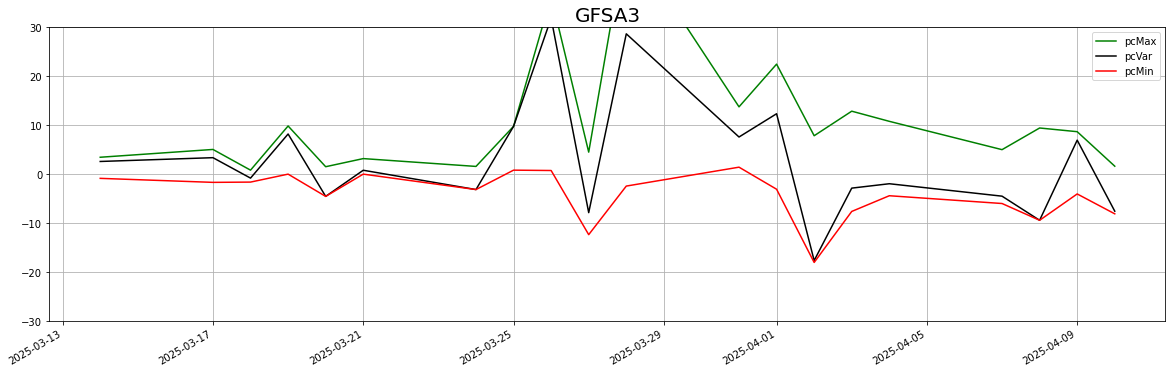

In [50]:
estatistica = consulta_acao(df, acao_adhoc)
gera_grafico(list(estatistica.dtPregao[:20]), 
             list(estatistica.pcMax[:20].replace('',0)), "pcMax",
             list(estatistica.pcVar[:20].replace('',0)), "pcVar",
             list(estatistica.pcMin[:20].replace('',0)), "pcMin",
             title=acao_adhoc,
             set_lim="y",
             figb=6
            )

In [51]:
mean_graph_days, mean_graph_mean, mean_graph_median, mean_graph_dates = [], [], [], []
cd_acao_mean = acao_adhoc.upper()
print(cd_acao_mean)

for i in range(20):
    mean_graph_days.append(i+1)
    mean_graph_dates.append(consulta_acao(df, cd_acao_mean)["dtPregao"][i:i+1].item())
    mean_graph_mean.append(consulta_acao(df, cd_acao_mean)["pcMax"].head(i+1).replace('',0).mean())
    mean_graph_median.append(consulta_acao(df, cd_acao_mean)["pcMax"].head(i+1).replace('',0).median())
    print(f'{str(mean_graph_days[i]).zfill(2)} dias,  mean {"{:,.5f}".format(mean_graph_mean[i], 5)},  median {"{:,.5f}".format(mean_graph_median[i])}, date {mean_graph_dates[i]}')

GFSA3
01 dias,  mean 1.62162,  median 1.62162, date 2025-04-10 00:00:00
02 dias,  mean 5.14607,  median 5.14607, date 2025-04-09 00:00:00
03 dias,  mean 6.57208,  median 8.67052, date 2025-04-08 00:00:00
04 dias,  mean 6.17906,  median 6.83526, date 2025-04-07 00:00:00
05 dias,  mean 7.10011,  median 8.67052, date 2025-04-04 00:00:00
06 dias,  mean 8.05961,  median 9.04730, date 2025-04-03 00:00:00
07 dias,  mean 8.02869,  median 8.67052, date 2025-04-02 00:00:00
08 dias,  mean 9.83347,  median 9.04730, date 2025-04-01 00:00:00
09 dias,  mean 10.26798,  median 9.42408, date 2025-03-31 00:00:00
10 dias,  mean 14.11923,  median 10.10420, date 2025-03-28 00:00:00
11 dias,  mean 13.24425,  median 9.42408, date 2025-03-27 00:00:00
12 dias,  mean 15.16525,  median 10.10420, date 2025-03-26 00:00:00
13 dias,  mean 14.74916,  median 9.75610, date 2025-03-25 00:00:00
14 dias,  mean 13.80814,  median 9.59009, date 2025-03-24 00:00:00
15 dias,  mean 13.09924,  median 9.42408, date 2025-03-21 00:0

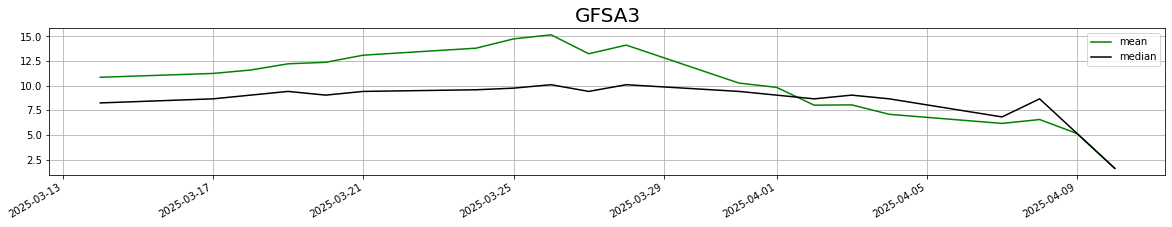

In [52]:
gera_grafico(mean_graph_dates, mean_graph_mean, "mean", mean_graph_median, "median", title=acao_adhoc)

In [29]:
buttons = widgets.HBox(lista_buttons)
widgets.VBox([buttons, output])

## Ações presentes em todos os períodos

In [30]:
merge_final

,Acao
0,BHIA3
1,RCSL4
2,LIGT3


## Grandes Variações de Volume

In [31]:
grandes_variacoes_volume(df)

'<< Sem ações com Grandes Variações de Volume >>'

In [32]:
try:
    df_json = pd.read_json("graficos.json")
    df_json = df_json.set_index("data")
except:
    df_json = pd.DataFrame()

In [33]:
list_datas, list_datas_dt, d05_count, d10_count, d15_count, d20_count, d25_count = [], [], [], [], [], [], []
df_temp, d05_temp, d10_temp, d15_temp, d20_temp, d25_temp =  df.copy(), d05.copy(), d10.copy(), d15.copy(), d20.copy(), d25.copy()
max_count = 20

bar = IntProgress(min=0, max=max_count*5, style=style, layout=layout) # instantiate the bar
display(bar) # display the bar

for i in range(0, max_count):
    dt_max = df_temp["dtPregao"].max()
    dt_max_str = str(dt_max)[0:10]
    list_datas.append(dt_max_str)
    
    if df_json.loc[(df_json.index == dt_max_str)].empty:
        d05_count.append(len(d05_temp))
        d10_count.append(len(d10_temp))
        d15_count.append(len(d15_temp))
        d20_count.append(len(d20_temp))
        d25_count.append(len(d25_temp))

        df_temp = df_temp.loc[df_temp["dtPregao"] != dt_max]
        d05_temp = monta_tabela(monta_df_periodos(df_temp, 5), 3000000, '1.0%', 5, 1, bar)
        d10_temp = monta_tabela(monta_df_periodos(df_temp, 10), 3000000, '1.0%', 9, 1, bar)
        d15_temp = monta_tabela(monta_df_periodos(df_temp, 15), 3000000, '1.0%', 14, 1, bar)
        d20_temp = monta_tabela(monta_df_periodos(df_temp, 20), 3000000, '1.0%', 18, 1, bar)
        d25_temp = monta_tabela(monta_df_periodos(df_temp, 25), 3000000, '1.0%', 22, 1, bar)
    else:
        d05_count.append(df_json.loc[dt_max_str]["qt_acoes_05"])
        d10_count.append(df_json.loc[dt_max_str]["qt_acoes_10"])
        d15_count.append(df_json.loc[dt_max_str]["qt_acoes_15"])
        d20_count.append(df_json.loc[dt_max_str]["qt_acoes_20"])
        d25_count.append(df_json.loc[dt_max_str]["qt_acoes_25"])
        
        df_temp = df_temp.loc[df_temp["dtPregao"] != dt_max]
    
        bar.value += 5 # signal to increment the progress bar

IntProgress(value=0, layout=Layout(width='400px'), style=ProgressStyle(description_width='initial'))

In [34]:
df_graficos = pd.DataFrame({'data': list_datas, \
                            'qt_acoes_05': d05_count, \
                            'qt_acoes_10': d10_count, \
                            'qt_acoes_15': d15_count, \
                            'qt_acoes_20': d20_count, \
                            'qt_acoes_25': d25_count  
                           })
df_graficos.to_json("graficos.json")

##### Gráfico 05

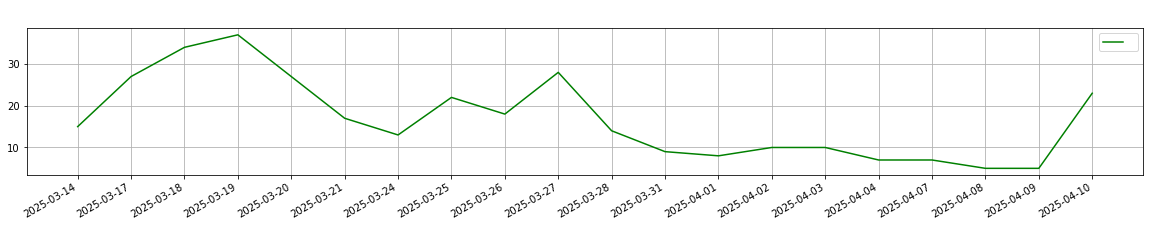

In [35]:
# gera_grafico(list_datas, d05_count)
gera_grafico(df_graficos.data, df_graficos.qt_acoes_05)

##### Gráfico 10

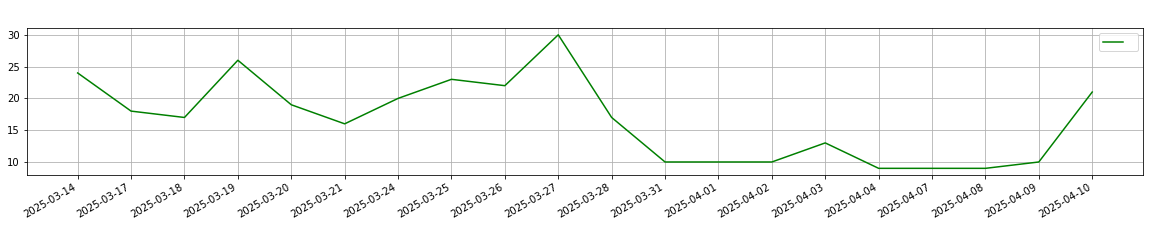

In [36]:
gera_grafico(df_graficos.data, df_graficos.qt_acoes_10)

##### Gráfico 15

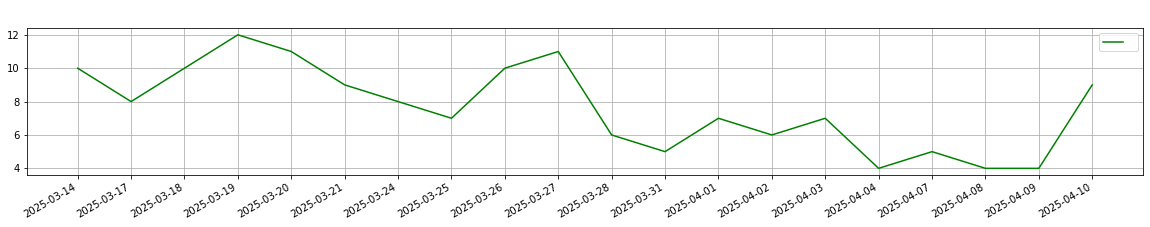

In [37]:
gera_grafico(df_graficos.data, df_graficos.qt_acoes_15)

##### Gráfico 20

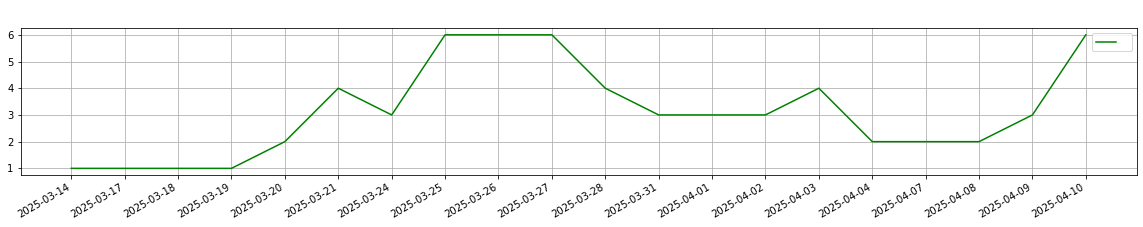

In [38]:
gera_grafico(df_graficos.data, df_graficos.qt_acoes_20)

##### Gráfico 25

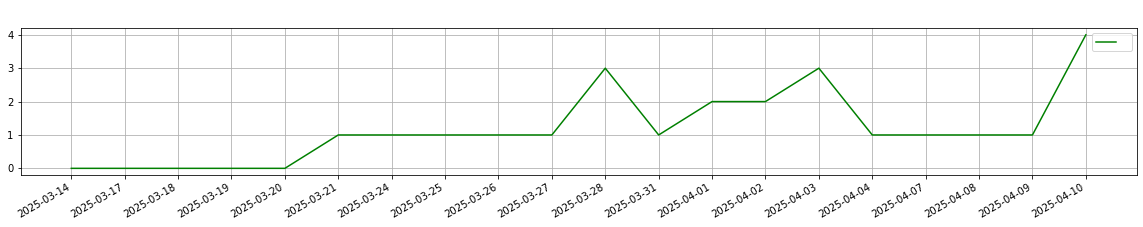

In [39]:
gera_grafico(df_graficos.data, df_graficos.qt_acoes_25)